# Рассмотрим имеющиеся данные о течении в канале с поворотом

In [100]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [101]:
data = pd.read_csv("../data/raw/ubend.pressureloss.csv")

In [102]:
data.sample(10)

,B4toD4,B5toB4,R45toB4,omega5,gammaU,alpha4,RE,pt_loss
525,0.020,1.50,5.0,0,0.5,50,500000,0.16650
872,0.100,1.00,0.9,0,-0.5,50,100000,0.13960
598,0.020,1.00,2.5,0,0.5,60,100000,0.16080
401,0.020,1.25,5.0,0,-0.5,30,500000,0.14460
34,0.005,1.25,0.9,0,0.0,60,100000,0.09338
699,0.100,1.25,2.5,0,0.5,20,500000,0.24140
223,0.005,1.00,0.9,0,-0.5,40,500000,0.04375
123,0.005,1.50,0.9,0,0.5,20,500000,0.08323
338,0.020,1.25,0.9,0,0.5,20,100000,0.12410
839,0.100,1.50,5.0,0,-0.5,60,500000,0.44240


In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 972 entries, 0 to 971
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   B4toD4   972 non-null    float64
 1   B5toB4   972 non-null    float64
 2   R45toB4  972 non-null    float64
 3   omega5   972 non-null    int64  
 4   gammaU   972 non-null    float64
 5   alpha4   972 non-null    int64  
 6   RE       972 non-null    int64  
 7   pt_loss  972 non-null    float64
dtypes: float64(5), int64(3)
memory usage: 60.9 KB


In [104]:
data.describe(include='all')

,B4toD4,B5toB4,R45toB4,omega5,gammaU,alpha4,RE,pt_loss
count,972.000000,972.000000,972.000000,972.0,972.000000,972.000000,972.00000,972.000000
mean,0.041667,1.250000,2.800000,0.0,0.000000,35.000000,300000.00000,0.198016
std,0.041721,0.204229,1.688075,0.0,0.408458,17.087043,200102.96011,0.127750
min,0.005000,1.000000,0.900000,0.0,-0.500000,10.000000,100000.00000,0.039100
25%,0.005000,1.000000,0.900000,0.0,-0.500000,20.000000,100000.00000,0.101475
50%,0.020000,1.250000,2.500000,0.0,0.000000,35.000000,300000.00000,0.159750
75%,0.100000,1.500000,5.000000,0.0,0.500000,50.000000,500000.00000,0.272275
max,0.100000,1.500000,5.000000,0.0,0.500000,60.000000,500000.00000,1.549000


array([[<Axes: title={'center': 'B4toD4'}>,
        <Axes: title={'center': 'B5toB4'}>,
        <Axes: title={'center': 'R45toB4'}>],
       [<Axes: title={'center': 'omega5'}>,
        <Axes: title={'center': 'gammaU'}>,
        <Axes: title={'center': 'alpha4'}>],
       [<Axes: title={'center': 'RE'}>,
        <Axes: title={'center': 'pt_loss'}>, <Axes: >]], dtype=object)

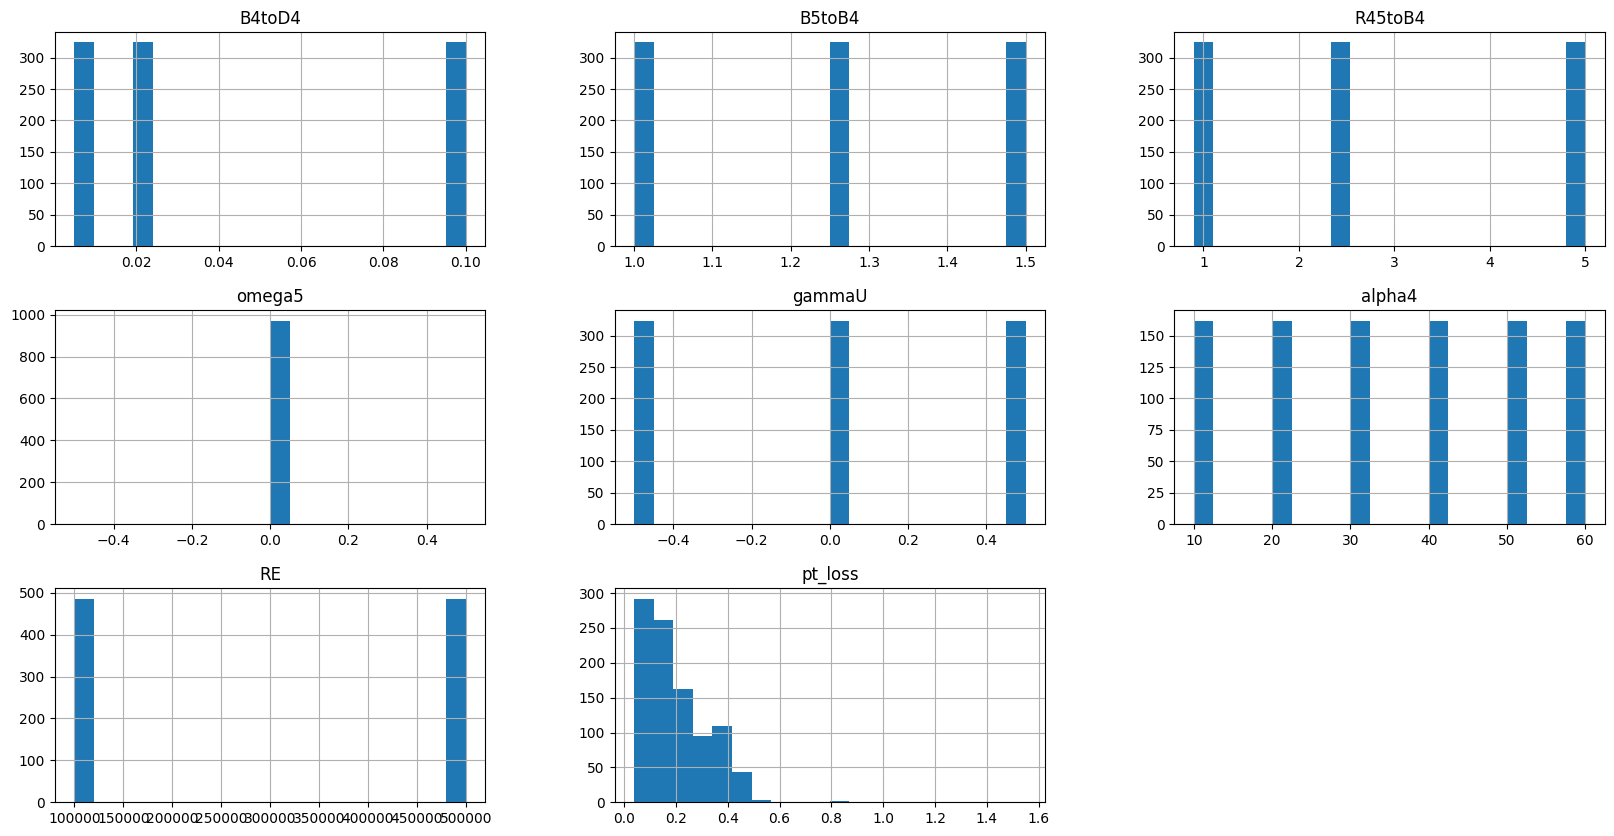

In [105]:
data.hist(bins=20, figsize=(20, 10))

In [106]:
for col in data.columns:
    print(f"For {col} col is {data[col].unique().shape[0]} unique values")

For B4toD4 col is 3 unique values
For B5toB4 col is 3 unique values
For R45toB4 col is 3 unique values
For omega5 col is 1 unique values
For gammaU col is 3 unique values
For alpha4 col is 6 unique values
For RE col is 2 unique values
For pt_loss col is 888 unique values


In [107]:
features = data.drop("pt_loss", axis=1)
features = (features - features.mean(axis=0)) / (features.std(axis=0) + 1e-5)

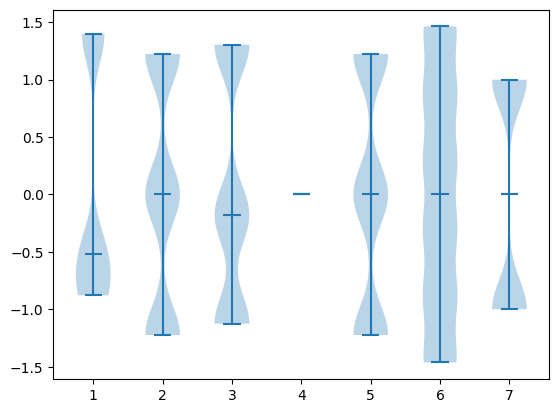

In [109]:
plt.violinplot(dataset=features, showmedians=True)
plt.show()